In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#import Image
from PIL import Image


# configure plotting
# plt.rcParams['figure.figsize'] = (16, 9)
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['lines.linewidth'] = 2


import glob

print "Loaded modules"

Loaded modules


In [72]:
files = glob.glob('data/*')

data = {}
for filepath in files:

    f = open(filepath,'r')
    lines = f.readlines()
    user_data = np.zeros((len(lines),3))
    for line_index in range(len(lines)):
        line = lines[line_index]
        user_data[line_index,:] = line.split('\t')
        
    
    data[filepath] = user_data

from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'text.fontsize': 10, # was 10
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'sans-serif',
              'figure.dpi' : 640      # double the resolution of the deful 80
    }

    plt.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

[ 479  959 1436 1917 2399 2879 3359]
[ 478  958 1435 1916 2398 2878 3358]
data/subject1crop.txt
[  7.968  15.969  23.971  31.988  40.007  48.008  56.009]
[ 479  959 1439 1917 2397 2877 3358]
[ 478  958 1438 1916 2396 2876 3357]
data/subject7crop.txt
[  7.968  15.973  23.97   31.971  39.973  47.974  55.992]
[  461   941  1421  1901  2381  2861  3342  3819  4688  6997  7478  7958
  8438  8918  9399  9879 10359]
[  460   940  1420  1900  2380  2860  3341  3818  4687  6996  7477  7957
  8437  8917  9398  9878 10358]
data/subject5crop.txt
[   7.668   15.669   23.67    31.672   39.674   47.674   55.692   63.694
   78.179  116.808  124.827  132.827  140.829  148.83   156.848  164.849
  172.851]
[ 480  961 1442 1923 2404 2884 3365]
[ 479  960 1441 1922 2403 2883 3364]
data/subject9crop.txt
[  7.983  15.999  24.015  32.033  40.049  48.049  56.066]
[ 479  959 1439 1919 2399 2879 3359]
[ 478  958 1438 1918 2398 2878 3358]
data/subject8crop.txt
[  7.968  15.969  23.97   31.988  39.989  47.991  55.

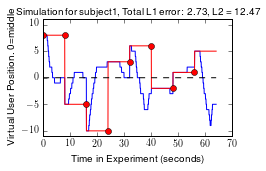

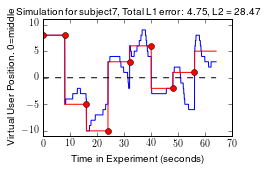

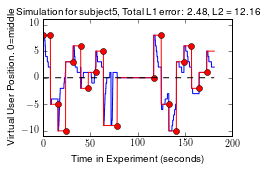

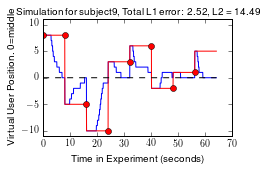

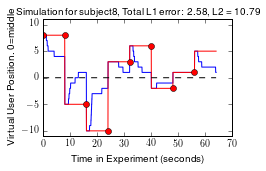

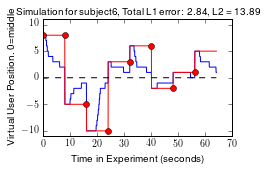

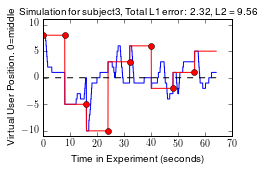

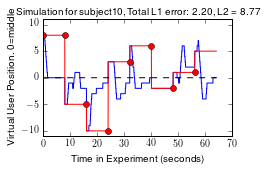

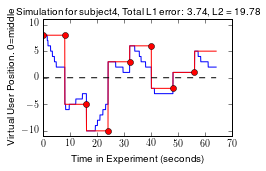

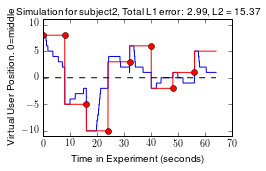

In [73]:

latexify() #fig_width=6.78
for key in data:
    subject = key.split('/')[1].split('.')[0].split('cr')[0]
    user_data = data[key]
    time = user_data[:,0] - min(user_data[:,0])
    pos = user_data[:,1]
    ctrl_signal = user_data[:,2]
    change_pts = np.array(np.where(abs(np.diff(ctrl_signal))>0))[0]

    print change_pts
    for x in range(len(change_pts)):
        change_pts[x] = change_pts[x]-1
    print change_pts
    
    error = abs(user_data[:,1]-10)
    plt.figure()
    plt.plot(time,pos-10)
    plt.hold('on')
    plt.plot(time,user_data[:,2]-10,'r')
    plt.plot(time[change_pts],ctrl_signal[change_pts-1]-10,'ro')
    plt.plot(0,ctrl_signal[0]-10,'ro')
    plt.plot(time,[0]*len(time),'k--')
    plt.title("Simulation for {0}, Total L1 error: {1:.2f}, L2 = {2:.2f}".format(
            subject, sum(error)/len(error), np.sum(np.square(error))/len(error)))
    plt.ylim([-11,11])
    plt.ylabel("Virtual User Position. 0=middle")
    plt.xlabel("Time in Experiment (seconds)")
    print key
    print time[change_pts]

data/subject1crop.txt
[  7.984  15.986  23.987  32.005  40.023  48.025  56.025]
data/subject7crop.txt
[  7.984  15.986  23.986  31.987  39.99   47.991  56.008]
skipping subject5
data/subject9crop.txt
[  8.     16.016  24.033  32.049  40.066  48.065  56.082]


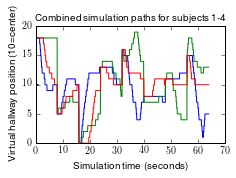

In [83]:
latexify() #fig_width=6.78

plt.figure()
num_do= 5
ctr = 0
for key in data:
    subject = key.split('/')[1].split('.')[0].split('cr')[0]
    if subject=="subject5":
        print "skipping subject5"
        continue
    if subject=="subject8":
        break
    user_data = data[key]
    time = user_data[:,0] - min(user_data[:,0])
    pos = user_data[:,1]
    ctrl_signal = user_data[:,2]
    change_pts = np.array(np.where(abs(np.diff(ctrl_signal))>0))[0]

    error = abs(user_data[:,1]-10)

    plt.plot(time,pos)
    plt.hold('on')
#     plt.plot(time/max(time),user_data[:,2],'r')
#     plt.plot(time[change_pts]/max(time),ctrl_signal[change_pts-1],'ro')
    plt.plot(time/max(time),[10]*len(time),'k--')
    plt.title("Combined simulation paths for subjects 1-4");
    plt.xlabel('Simulation time (seconds)')
    plt.ylabel('Virtual hallway position (10=center)')
    print key
    print time[change_pts]

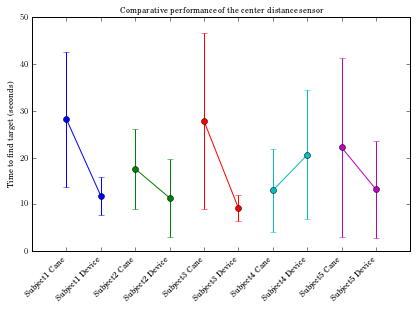

In [25]:
latexify(fig_width=6.78,columns=1) #fig_width=6.78

a = [28.2, 11.8,17.6,11.4,27.8,9.2,13,20.6,22.2,13.2]
t = np.arange(len(a))
s = [14.5,4.0,8.6,8.4,18.8,2.8,8.9,13.8,19.2,10.4]
labels = ["Subject1 Cane", "Subject1 Device", "Subject2 Cane", "Subject2 Device", "Subject3 Cane", 
          "Subject3 Device", "Subject4 Cane", "Subject4 Device", "Subject5 Cane", "Subject5 Device"]
plt.figure()

plt.errorbar(t[0:2],a[0:2], yerr=s[0:2],fmt='o-')
plt.hold('on')
plt.errorbar(t[2:4],a[2:4], yerr=s[2:4],fmt='o-')
plt.errorbar(t[4:6],a[4:6], yerr=s[4:6],fmt='o-')
plt.errorbar(t[6:8],a[6:8], yerr=s[6:8],fmt='o-')
plt.errorbar(t[8:10],a[8:10], yerr=s[8:10],fmt='o-')

plt.title("Comparative performance of the center distance sensor ")
plt.xlim([-1,len(a)])
plt.xticks(t, labels,rotation=45,ha='right')
plt.ylabel("Time to find target (seconds)")

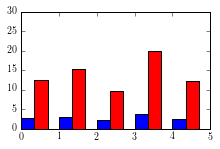

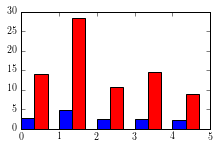

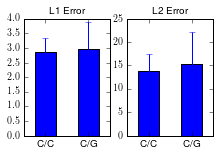

In [79]:
L1_notesame = [2.73,2.99,2.32, 3.74,2.48]
L2_notesame = [12.47,15.37,9.56,19.78,12.16]

L1_notesame_mean = np.mean(L1_notesame)
L1_notesame_std = np.std(L1_notesame)
L2_notesame_mean = np.mean(L2_notesame)
L2_notesame_std = np.std(L2_notesame)

L1_notediff = [2.84,4.75,2.58, 2.52,2.20]
L2_notediff = [13.89,28.47,10.79,14.49,8.77]

L1_notediff_mean = np.mean(L1_notediff)
L1_notediff_std = np.std(L1_notediff)
L2_notediff_mean = np.mean(L2_notediff)
L2_notediff_std = np.std(L2_notediff)

N= 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, L1_notesame, width)
rects2 = ax.bar(ind + width, L2_notesame, width, color='r')
plt.ylim([0,30])

fig, ax = plt.subplots()
rects1 = ax.bar(ind, L1_notediff, width)
rects2 = ax.bar(ind + width, L2_notediff, width, color='r')
plt.ylim([0,30])

plt.figure()
plt.subplot(1,2,1)
plt.bar([0.25,1.25], [L1_notesame_mean,L1_notediff_mean], .5, color='b', yerr=[L1_notesame_std,L1_notediff_std])
plt.xlim([0,2])
plt.xticks([0.5,1.5], ('C/C', 'C/G'),rotation=0,ha='center')
plt.title("L1 Error")

# plt.figure()
plt.subplot(1,2,2)
plt.bar([0.25,1.25], [L2_notesame_mean,L2_notediff_mean], .5, color='b', yerr=[L2_notesame_std,L2_notediff_std])
plt.xlim([0,2])
plt.xticks([0.5,1.5], ('C/C', 'C/G'),rotation=0,ha='center')
plt.title("L2 Error")

